# 190071B

## Question 1

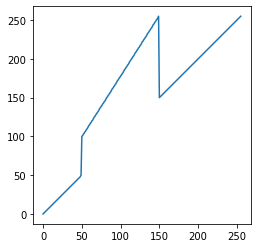

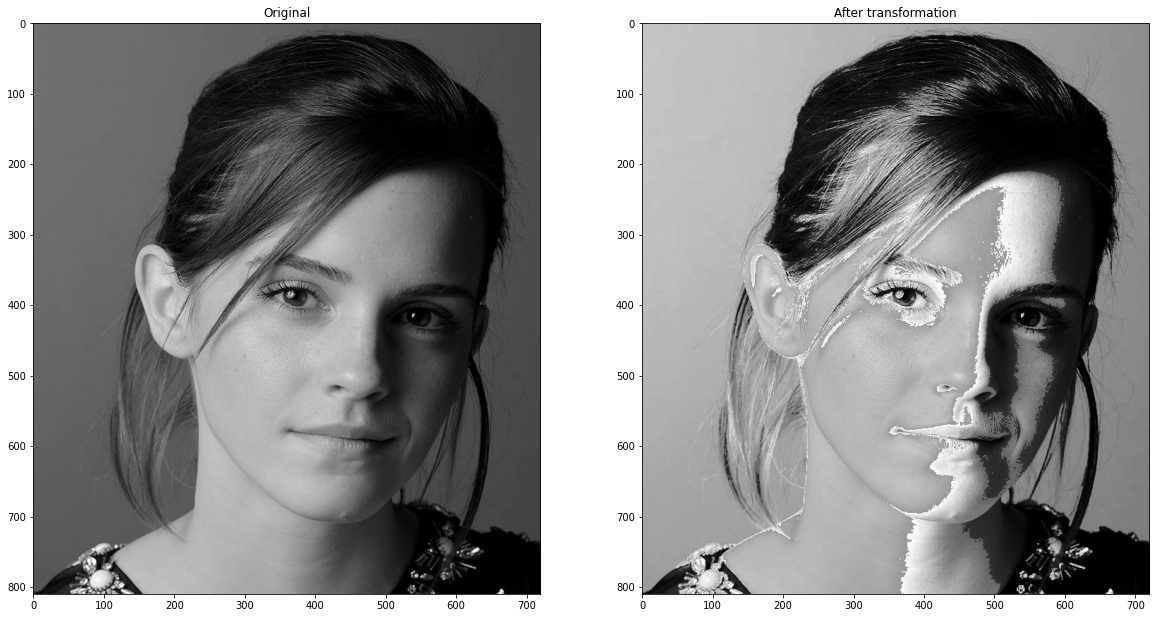

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None

transform1 = np.linspace(0,50,50)
#transform2 = np.linspace(50,100,1)
transform3 = np.linspace(100,255,100)
#transform4 = np.linspace(255,150,1)
transform5 = np.linspace(150,255,106)
transform = np.concatenate((transform1,transform3,transform5), axis = 0).astype(np.uint8)

transformedImg = cv.LUT(img,transform)
# transformedImg = transform[img]#both are same this is the numpy way of doing that

fig, ax = plt.subplots()
ax.plot(transform)
ax.set_aspect('equal')
assert len(transform)==256
im = cv.cvtColor(img, cv.COLOR_BGR2RGB)
im2 = cv.cvtColor(transformedImg, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,2, figsize = (20,20))
ax[0].imshow(im)
ax[1].imshow(im2)
ax[0].set_title('Original')
ax[1].set_title('After transformation')
plt.show()


## Question 2

### White Matters

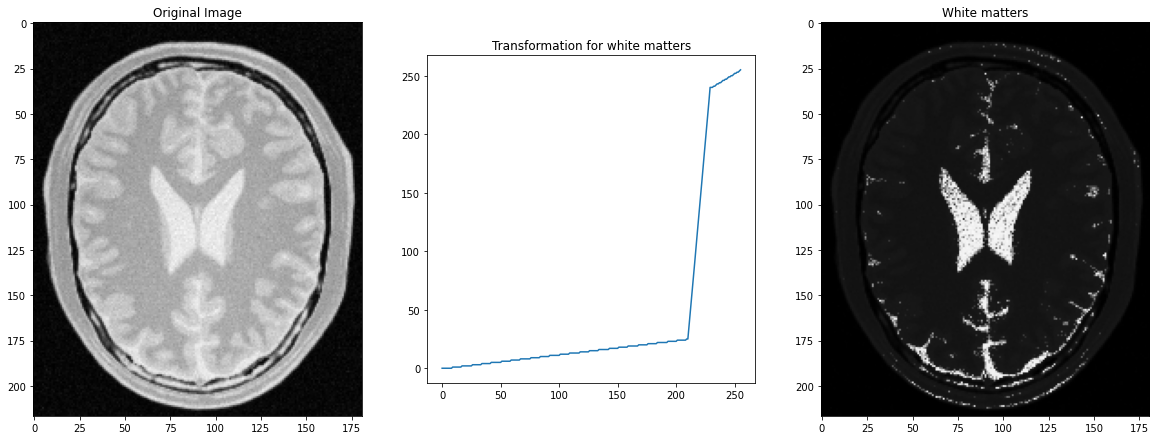

In [38]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('brain_proton_density_slice.png')
imgConverted = cv.cvtColor(img, cv.COLOR_BGR2RGB)
fig, ax = plt.subplots(1,3,figsize = (20,20))
ax[0].imshow(imgConverted)


#white matter transformation
transform1 = np.linspace(0,25,210)
#transform2 = np.linspace(50,100,1)
transform3 = np.linspace(25,240,20)
#transform4 = np.linspace(255,150,1)
transform5 = np.linspace(240,255,26)
transform = np.concatenate((transform1,transform3,transform5), axis = 0).astype(np.uint8)
transformedImg = cv.LUT(img,transform)
imgConvertedTransformed = cv.cvtColor(transformedImg, cv.COLOR_BGR2RGB)
ax[2].imshow(imgConvertedTransformed)
ax[1].plot(transform)
ax[1].set_aspect('equal')
ax[0].set_title('Original Image')
ax[2].set_title('White matters')
ax[1].set_title('Transformation for white matters')
plt.show()


## Gray Matters

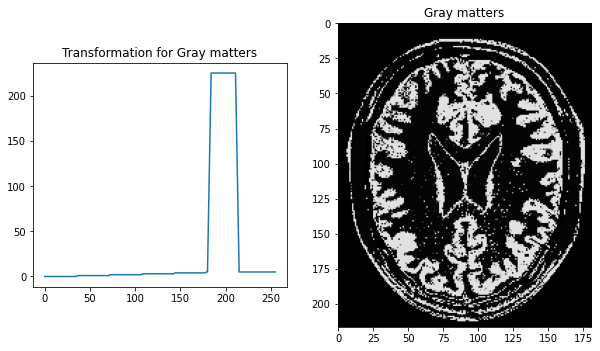

In [66]:
#gray matter transformation
transform1 = np.linspace(0,5,180)
transform2 = np.linspace(5,225,5)
transform3 = np.linspace(225,225,26)
transform4 = np.linspace(225,5,5)
transform5 = np.linspace(5,5,40)


fig, ax = plt.subplots(1,2, figsize = (10,10))

transform = np.concatenate((transform1,transform2,transform3,transform4,transform5), axis = 0).astype(np.uint8)
transformedImg = cv.LUT(img,transform)
imgConvertedTransformed = cv.cvtColor(transformedImg, cv.COLOR_BGR2RGB)
ax[0].plot(transform)
ax[0].set_aspect('equal')
ax[1].imshow(imgConvertedTransformed)
ax[1].set_title('Gray matters')
ax[0].set_title('Transformation for Gray matters')
plt.show()

## Question 3

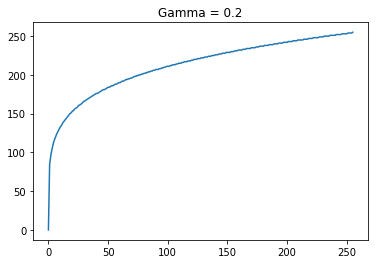

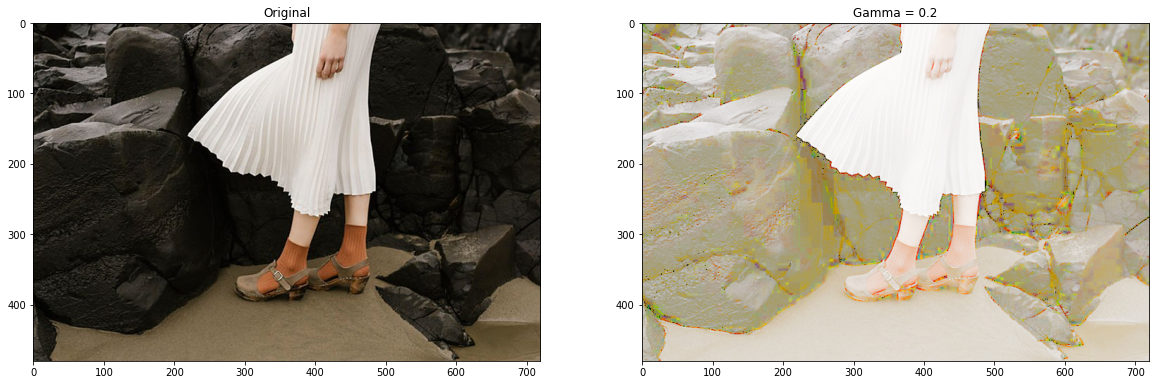

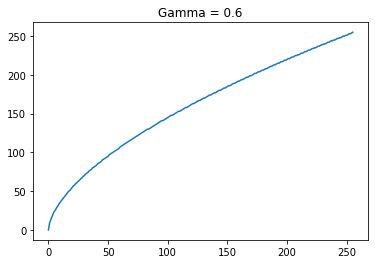

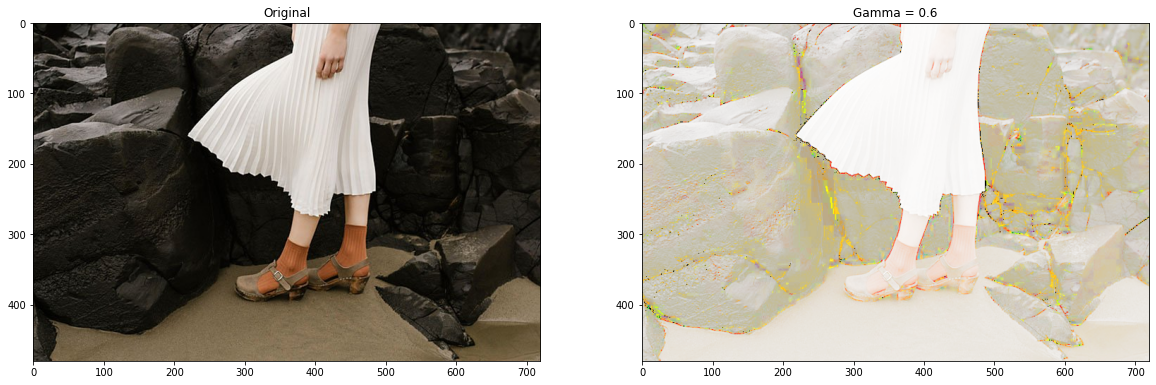

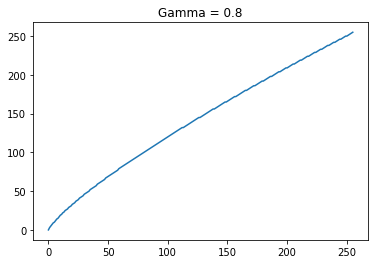

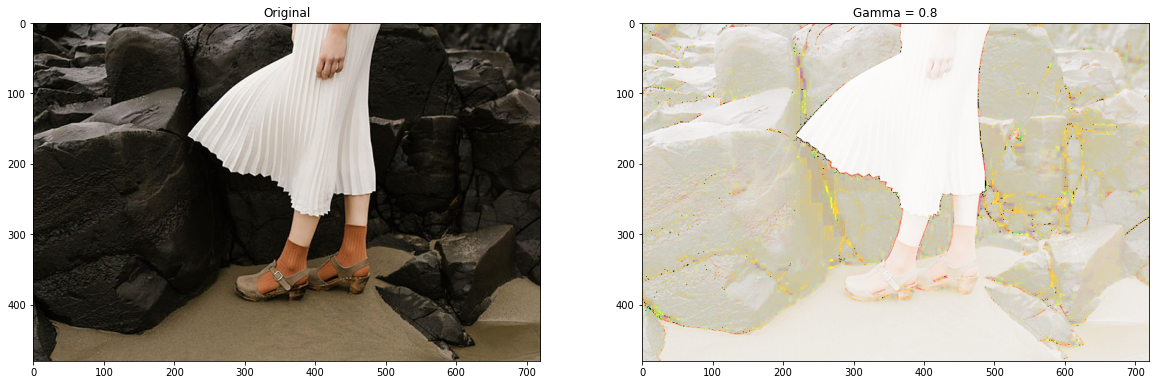

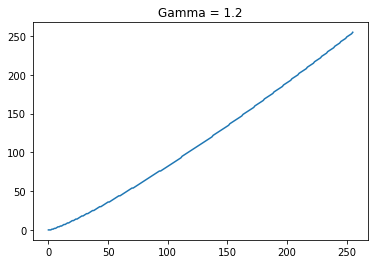

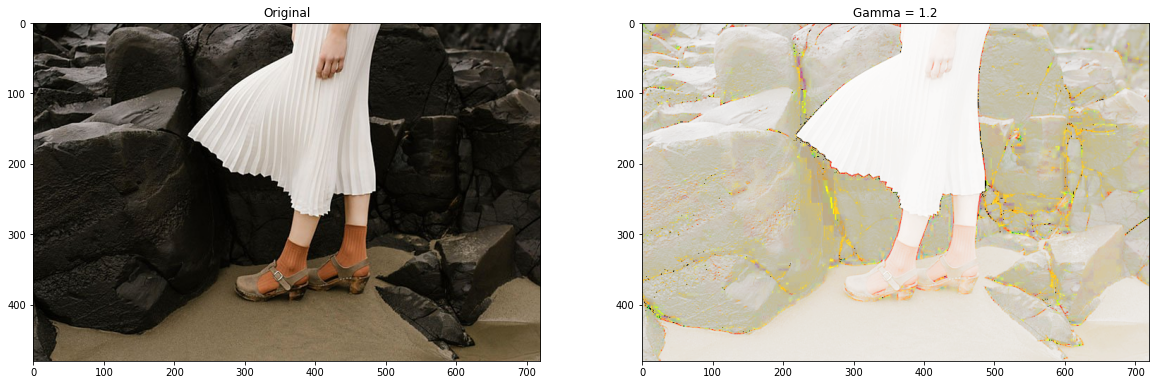

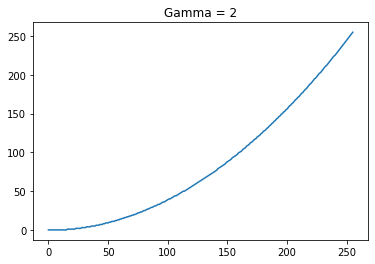

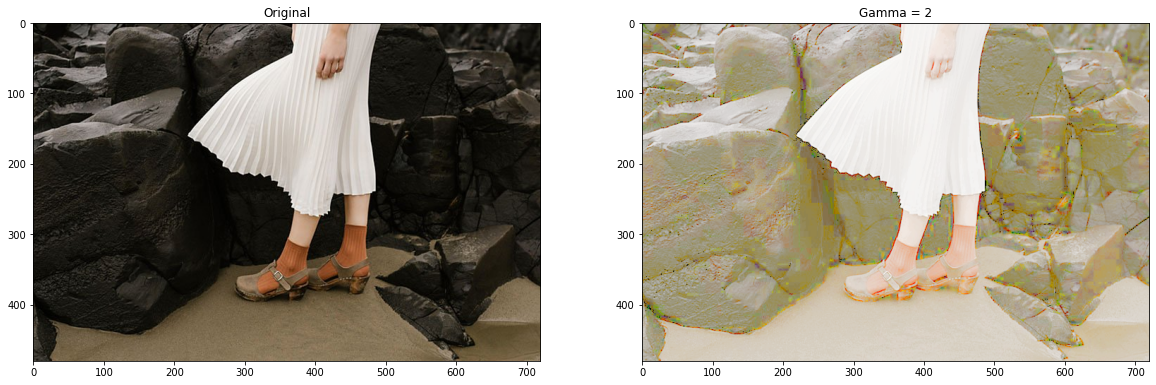

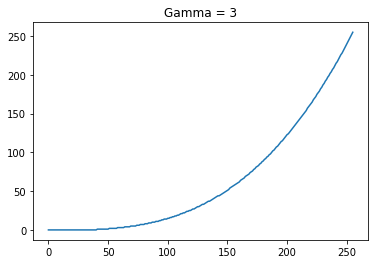

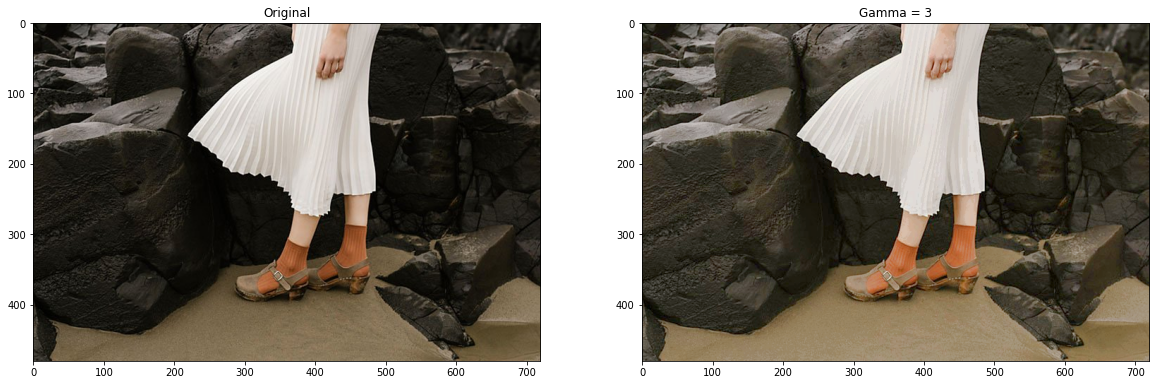

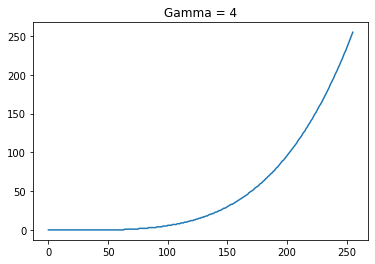

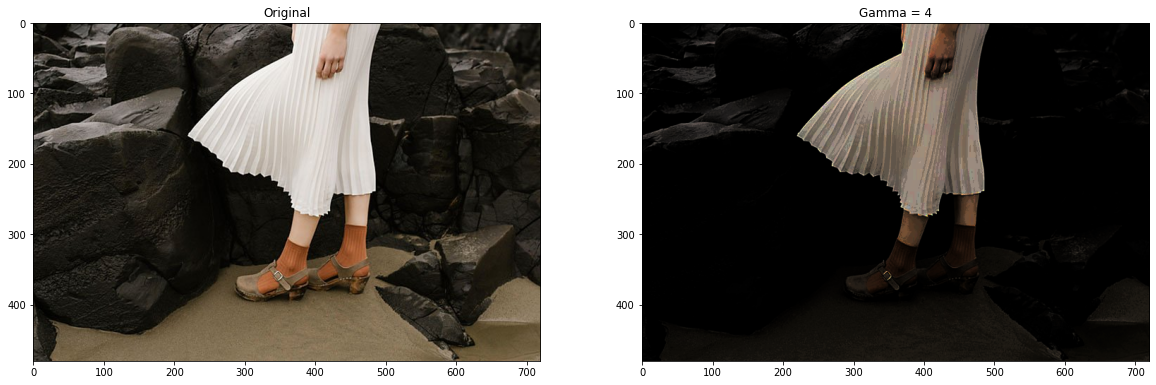

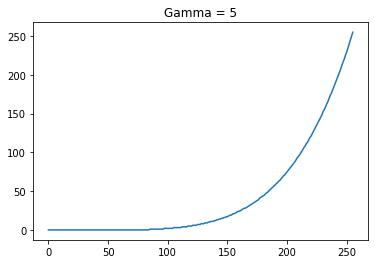

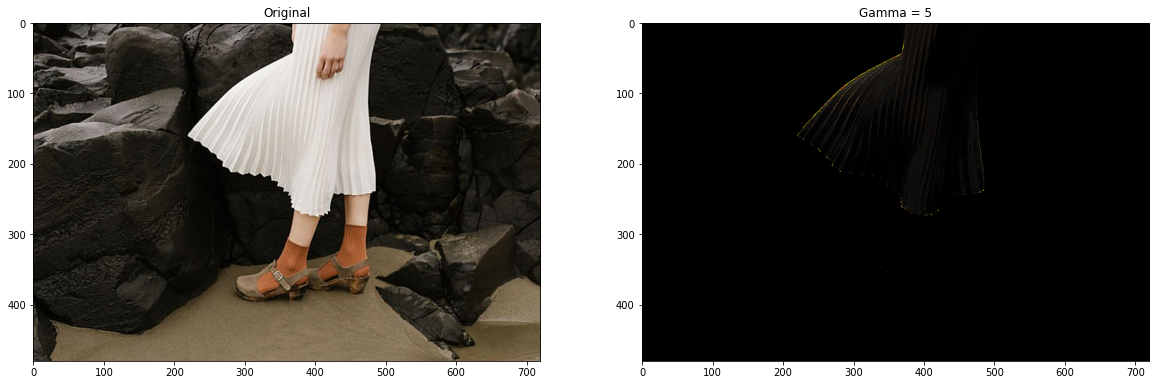

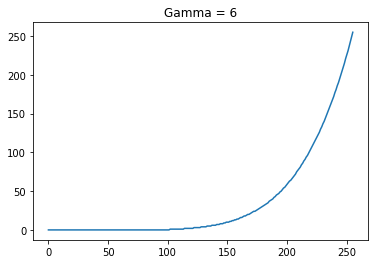

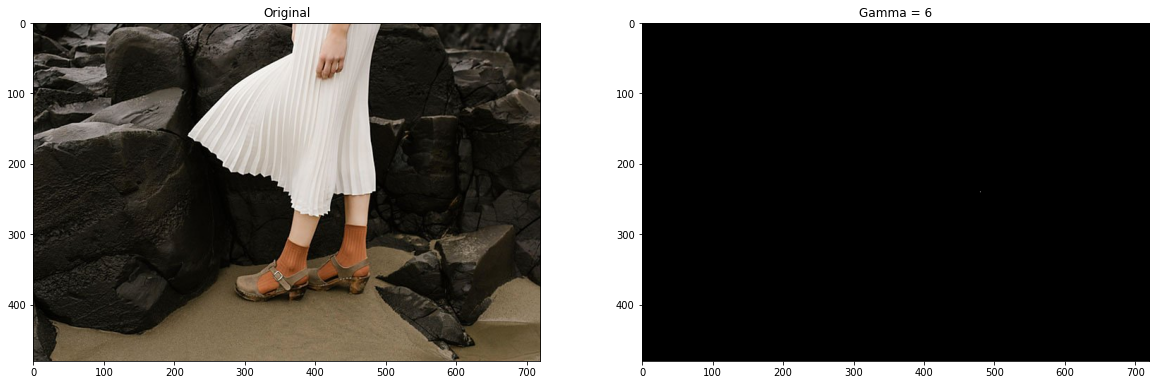

In [88]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('highlights_and_shadows.jpg', cv.IMREAD_COLOR)
# imgConverted = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# ax[0].imshow(imgConverted)

imgHab = cv.cvtColor(img, cv.COLOR_BGR2HLS)
# imgForplt = cv.cvtColor(imgHab, cv.COLOR_BGR2RGB)
# ax[1].imshow(imgForplt)


gamma = [0.2,0.6,0.8,1.2,2,3,4,5,6]
for k in gamma:
    
    transform = np.array([(p/255)**k*255 for p in range(0,256)]).astype(np.uint8)#
    imgHab[:,:,1]  = cv.LUT(imgHab[:,:,1],transform)
    fig, ax = plt.subplots()
    ax.plot(transform)
    ax.set_title('Gamma = %s'%k)
    convertedImg1 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    convertedImg2 = cv.cvtColor(imgHab, cv.COLOR_HLS2RGB)
    fig, ax = plt.subplots(1,2, figsize = (20,20))
    ax[0].imshow(convertedImg1)
    ax[1].imshow(convertedImg2)
    ax[0].set_title('Original')
    ax[1].set_title('Gamma = %s'%k)

plt.show()